In [80]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from operator import itemgetter
import seaborn as sns

%matplotlib inline

In [81]:
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import grid_search
from sklearn.ensemble import RandomForestRegressor

In [82]:
df5 = pd.read_csv('final_movies_merged_2015.csv')
df6 = pd.read_csv('final_movie_merged_2016.csv')

df5.reset_index()
df6.reset_index()

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,Movie,Distributor,WW_gross,Domestic_gross,Domestic_percentage,Intr_gross,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,UsDist,UsRelease,Venezuela,Vietnam,dummy,updatedGenre
0,0,0,0,0,Captain America: Civil War,BV,1151000000,406600000,35.3,744400000,...,1429130,5954891,53776688,NaN,Buena Vista,2016-05-06,1947286,NaN,NaN,Adventure
1,1,1,1,1,Zootopia,BV,1021700000,341100000,33.4,680600000,...,2116321,2057383,33903452,463743,Buena Vista,2016-03-04,1628000,NaN,NaN,Animation
2,2,2,2,2,The Jungle Book (2016),BV,936800000,360900000,38.5,575900000,...,1828028,9052232,66133514,188939,"April 15, 2016",NaN,1515537,NaN,NaN,NaN
3,3,3,3,3,Batman v Superman: Dawn of Justice,WB,872700000,330400000,37.9,542300000,...,1279073,7028576,53128158,329922,Warner Bros.,2016-03-25,950317,2240920,NaN,Adventure
4,4,4,4,4,Deadpool,Fox,782000000,363100000,46.4,419000000,...,2087589,4089919,53538139,301763,Fox,2016-02-12,656126,1566065,NaN,Action
5,5,5,5,5,Finding Dory,BV,721900000,445700000,61.7,276200000,...,763155,3393648,NaN,NaN,Buena Vista,2016-06-17,1999506,NaN,NaN,Animation
6,6,6,6,6,The Mermaid (Mei ren yu),Sony,553800000,3200000,0.6,550600000,...,NaN,NaN,173553,NaN,Sony / Columbia,2016-02-19,NaN,4419787,NaN,Drama
7,7,7,7,7,X-Men: Apocalypse,Fox,533900000,155000000,29.0,378900000,...,903314,3687678,24287465,NaN,Fox,2016-05-27,NaN,NaN,NaN,Adventure
8,8,8,8,8,Kung Fu Panda 3,Fox,519000000,143500000,27.7,375500000,...,1140564,3452329,20321914,368339,"January 29, 2016",NaN,712073,NaN,NaN,NaN
9,9,9,9,9,Warcraft,Uni.,432200000,47000000,10.9,385200000,...,1997345,2414685,8882000,32000,Universal,2016-06-10,98000,1385331,NaN,Fantasy


In [83]:
listCols = ['Movie','Distributor','WW_gross','Domestic_gross','Domestic_percentage',
           'Intr_gross','Intr_percentage','movie','China','Dist','MpaaRating','ProdBudget',
            'Russia - CIS','Japan','United Kingdom','UsDist','UsRelease','updatedGenre']

df5_v3 = df5[listCols]
df6_v3 = df6[listCols]

In [84]:
dfcomb3 = pd.DataFrame(columns=['dummy2'])
dfcomb3 = dfcomb3.append(df5_v3)
dfcomb3 = dfcomb3.append(df6_v3)

In [85]:
dfcomb3['updatedGenre'].unique()

array(['Sci-Fi Fantasy', 'Horror', 'Action', nan, 'Sci-Fi', 'Fantasy',
       'Animation', 'Comedy', 'Drama', 'Thriller', 'Western', 'Adventure',
       'Romance', 'Musical', 'Foreign', 'Sci-Fi Thriller', 'Documentary',
       'Romantic Thriller', 'Family', 'Crime', 'Crime Thriller', 'R'], dtype=object)

In [86]:
len(dfcomb3)

589

### !!! Don't resave !!!

In [7]:
dfcomb3.to_csv('combined_data3.csv', encoding='utf-8')

### !!! Don't resave !!!

## Analysis 1:
In this analysis I will run with only the country percentages

In [108]:
df = pd.read_csv('combined_data3.csv')
df.head()

,Unnamed: 0,China,Dist,Distributor,Domestic_gross,Domestic_percentage,Intr_gross,Intr_percentage,Japan,Movie,MpaaRating,ProdBudget,Russia - CIS,United Kingdom,UsDist,UsRelease,WW_gross,dummy2,movie,updatedGenre
0,0,124159138,Disney,BV,936700000,45.3,1131600000,54.7,97862640,Star Wars: The Force Awakens,PG-13,245000000,25952440,182474597,Buena Vista,2015-12-18,2068200000,NaN,starwars7,Sci-Fi Fantasy
1,1,228740000,UPI,Uni.,652300000,39.0,1018100000,61.0,74593781,Jurassic World,PG-13,150000000,23420356,99669369,Universal,2015-06-12,1670400000,NaN,jurassicpark4,Horror
2,2,390910000,UPI,Uni.,353000000,23.3,1163000000,76.7,30810953,Furious 7,PG-13,190000000,34016389,59927904,Universal,2015-04-03,1516000000,NaN,fast7,Action
3,3,240110000,Disney,BV,459000000,32.7,946400000,67.3,26373434,Avengers: Age of Ultron,PG-13,250000000,34319424,76623201,Buena Vista,2015-05-01,1405400000,NaN,avengers2,Action
4,4,68490000,UPI,Uni.,336000000,29.0,823400000,71.0,42726353,Minions,PG,74000000,30015860,72674232,"July 10, 2015",NaN,1159400000,NaN,minions,NaN


In [115]:
intr_gross = np.sum(df.Domestic_gross)/1000000

In [116]:
domet_gross = np.sum(df.Intr_gross)/1000000

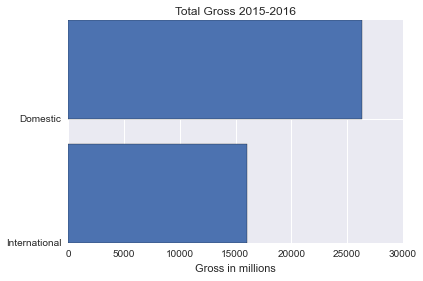

In [119]:
categories = ['International','Domestic']
values = [intr_gross, domet_gross]

plt.barh(range(len(categories)), values)
plt.yticks(range(len(categories)), categories)
plt.xlabel('Gross in millions')
plt.title('Total Gross 2015-2016')
plt.show()

In [88]:
def calcPercentage(numerator, denominator):
    out = numerator/denominator*100
    return out

df['China_percentage'] = df.apply(lambda row: calcPercentage(row.China,row.WW_gross), axis=1).fillna(0)
df['Russia_percentage'] = df.apply(lambda row: calcPercentage(row['Russia - CIS'],row.WW_gross), axis=1).fillna(0)
df['UK_percentage'] = df.apply(lambda row: calcPercentage(row['United Kingdom'],row.WW_gross), axis=1).fillna(0)
df['Japan_percentage'] = df.apply(lambda row: calcPercentage(row.Japan,row.WW_gross), axis=1).fillna(0)
df['Budget_percentage'] = df.apply(lambda row: calcPercentage(row.ProdBudget,row.WW_gross), axis=1).fillna(0)

In [89]:
df.columns

Index(['Unnamed: 0', 'China', 'Dist', 'Distributor', 'Domestic_gross',
       'Domestic_percentage', 'Intr_gross', 'Intr_percentage', 'Japan',
       'Movie', 'MpaaRating', 'ProdBudget', 'Russia - CIS', 'United Kingdom',
       'UsDist', 'UsRelease', 'WW_gross', 'dummy2', 'movie', 'updatedGenre',
       'China_percentage', 'Russia_percentage', 'UK_percentage',
       'Japan_percentage', 'Budget_percentage'],
      dtype='object')

Since I have found 'dummy2' as the column above I need to delete it.

In [90]:
del df['dummy2']
del df['Unnamed: 0']

In [12]:
# if we try to map from categorical to numerical
'''
dist_val = list(dfcomb3.Dist.unique())
dist_index = [i for i in range(len(dist_val))]
len(dist_index)

dist_mapping = dict(zip(dist_index,dist_val))
dfcomb3['Dist'] = dfcomb3['Dist'].map(dist_mapping)
'''
df

,China,Dist,Distributor,Domestic_gross,Domestic_percentage,Intr_gross,Intr_percentage,Japan,Movie,MpaaRating,...,UsDist,UsRelease,WW_gross,movie,updatedGenre,China_percentage,Russia_percentage,UK_percentage,Japan_percentage,Budget_percentage
0,124159138,Disney,BV,936700000,45.3,1131600000,54.7,97862640,Star Wars: The Force Awakens,PG-13,...,Buena Vista,2015-12-18,2068200000,starwars7,Sci-Fi Fantasy,6.003246,1.254832,8.822870,4.731778,11.846050
1,228740000,UPI,Uni.,652300000,39.0,1018100000,61.0,74593781,Jurassic World,PG-13,...,Universal,2015-06-12,1670400000,jurassicpark4,Horror,13.693726,1.402081,5.966797,4.465624,8.979885
2,390910000,UPI,Uni.,353000000,23.3,1163000000,76.7,30810953,Furious 7,PG-13,...,Universal,2015-04-03,1516000000,fast7,Action,25.785620,2.243825,3.953028,2.032385,12.532982
3,240110000,Disney,BV,459000000,32.7,946400000,67.3,26373434,Avengers: Age of Ultron,PG-13,...,Buena Vista,2015-05-01,1405400000,avengers2,Action,17.084816,2.441968,5.452056,1.876578,17.788530
4,68490000,UPI,Uni.,336000000,29.0,823400000,71.0,42726353,Minions,PG,...,"July 10, 2015",NaN,1159400000,minions,NaN,5.907366,2.588913,6.268262,3.685212,6.382612
5,83509789,Sony,Sony,200100000,22.7,680600000,77.3,24231095,Spectre,PG-13,...,Sony / Columbia,2015-11-06,880700000,bond24,Action,9.482206,1.315423,15.381132,2.751345,27.818781
6,15314000,Disney,BV,356500000,41.6,501000000,58.4,32500000,Inside Out,PG,...,"June 19, 2015",NaN,857400000,pixar2014,NaN,1.786098,1.948925,6.932229,3.790530,20.410544
7,135653541,UIP,Par.,195000000,28.6,487300000,71.4,42091079,Mission: Impossible - Rogue Nation,PG-13,...,Paramount,2015-07-31,682300000,mi5,Action,19.881803,1.456965,4.680741,6.168999,21.984464
8,21525450,-,LGF,281700000,43.1,371700000,56.9,1225393,The Hunger Games: Mockingjay - Part 2,PG-13,...,Lionsgate,2015-11-20,653400000,hungergames4,Action,3.294376,1.555195,6.604635,0.187541,24.487297
9,94932731,Fox,Fox,228400000,36.2,401700000,63.8,26943966,The Martian,PG-13,...,Fox,2015-10-02,630200000,scott2016,Sci-Fi,15.063905,2.809601,5.385249,4.275463,17.137417


In [91]:
df2.head()

,Domestic_percentage,Intr_percentage,WW_gross,China_percentage,Russia_percentage,UK_percentage,Japan_percentage,Budget_percentage
0,45.3,54.7,2068200000,6.003246,1.254832,8.822870,4.731778,11.846050
1,39.0,61.0,1670400000,13.693726,1.402081,5.966797,4.465624,8.979885
2,23.3,76.7,1516000000,25.785620,2.243825,3.953028,2.032385,12.532982
3,32.7,67.3,1405400000,17.084816,2.441968,5.452056,1.876578,17.788530
4,29.0,71.0,1159400000,5.907366,2.588913,6.268262,3.685212,6.382612


In [92]:
# we would use the following if we needed to drop a column, remember inplace has to be true if we are changing
# the df itself
#dfcomb3.drop('Dist', axis=1)
#dfcomb4 = dfcomb3.drop('Dist', axis=1).dropna(axis=0, how='any', inplace=False)

trainCols = ['Domestic_percentage','Intr_percentage','WW_gross', 'China_percentage','Russia_percentage','UK_percentage', 'Japan_percentage','Budget_percentage']

df2 = df[trainCols]
df2.dropna(axis=0, how='any', inplace=True)
df2.columns

C:\Python34\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['Domestic_percentage', 'Intr_percentage', 'WW_gross',
       'China_percentage', 'Russia_percentage', 'UK_percentage',
       'Japan_percentage', 'Budget_percentage'],
      dtype='object')

In [94]:
from sklearn.preprocessing import StandardScaler

trainCols = ['Domestic_percentage','Intr_percentage','China_percentage','Russia_percentage',
             'UK_percentage', 'Japan_percentage','Budget_percentage']

y = df['WW_gross']
stdsc = StandardScaler()

y_std = stdsc.fit_transform(y)
X = df[trainCols]

#X.drop('WW_gross', axis=1, inplace=True)

#y = df2['WW_gross']
X.columns
y_std

C:\Python34\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Python34\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([  9.90014890e+00,   7.92733708e+00,   7.16162027e+00,
         6.61312106e+00,   5.39313185e+00,   4.01097334e+00,
         3.89542152e+00,   3.02704709e+00,   2.88372315e+00,
         2.76866726e+00,   2.47507636e+00,   2.33869545e+00,
         2.28662274e+00,   2.21917618e+00,   1.99402370e+00,
         1.99005626e+00,   1.82838289e+00,   1.69844908e+00,
         1.55760480e+00,   1.51991408e+00,   1.28930636e+00,
         1.26252611e+00,   1.24715226e+00,   1.19210397e+00,
         1.11771438e+00,   1.06911319e+00,   9.30748556e-01,
         9.29756695e-01,   9.14382847e-01,   8.64293859e-01,
         8.57846762e-01,   8.35529886e-01,   8.12221149e-01,
         8.07757774e-01,   7.17994340e-01,   6.80799547e-01,
         6.52035574e-01,   6.43108824e-01,   6.08393683e-01,
         5.55825043e-01,   5.04248263e-01,   4.76476151e-01,
         4.64077887e-01,   4.15972621e-01,   3.88200509e-01,
         3.41583035e-01,   3.39599313e-01,   3.33648146e-01,
         3.06371965e-01,

In [95]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y_std, test_size=0.3, random_state=42)

In [96]:
rfmodel = RandomForestRegressor(n_estimators=300, max_features=4)

In [21]:
rfmodel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [22]:
rfmodel.score(X_test, y_test)

0.54038387466106341

In [40]:
sorted(list(zip(X_train.columns, rfmodel.feature_importances_)), key=itemgetter(1), reverse=True)[:5]

[('China_percentage', 0.24343837004812779),
 ('Japan_percentage', 0.22638686478190237),
 ('Budget_percentage', 0.14612970023105251),
 ('Domestic_percentage', 0.10210107793662823),
 ('Russia_percentage', 0.096116621361948332)]

Apply grid search

In [42]:
parameters = {'n_estimators': tuple([i for i in range(100,1200,200)]),
              'max_features': tuple([i for i in range(2,7,1)])}

grid_searcher = grid_search.GridSearchCV(RandomForestRegressor(), parameters, cv=5)
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 300, 500, 700, 900, 1100), 'max_features': (2, 3, 4, 5, 6)},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [43]:
grid_searcher.best_score_

0.6018809507960251

In [44]:
grid_searcher.best_params_

{'max_features': 2, 'n_estimators': 300}

In [48]:
rfmodelA_gridOptimized = RandomForestRegressor(n_estimators=300, max_features=2)
rfmodelA_gridOptimized.fit(X_train,y_train)
rfmodelA_gridOptimized.score(X_test, y_test)

0.51615241282937063

In [56]:
resultA = sorted(list(zip(X_train.columns, rfmodel.feature_importances_)), key=itemgetter(1), reverse=True)[:5]
resultA

[('China_percentage', 0.24343837004812779),
 ('Japan_percentage', 0.22638686478190237),
 ('Budget_percentage', 0.14612970023105251),
 ('Domestic_percentage', 0.10210107793662823),
 ('Russia_percentage', 0.096116621361948332)]

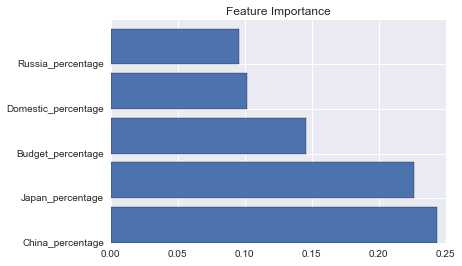

In [71]:
categories = [x[0] for x in resultA]
values = [x[1] for x in resultA]

plt.barh(range(len(categories)), values)
plt.yticks(range(len(categories)), categories)
plt.title('Feature Importance')

In [100]:
linreg = linear_model.LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

C:\Python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


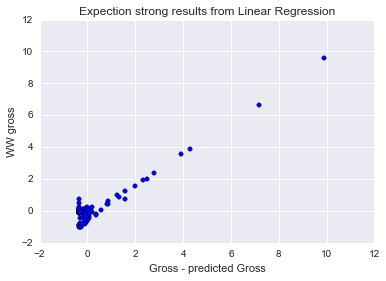

In [106]:
temp = np.linspace(0,100,1000)
plt.xlabel('Gross - predicted Gross')
plt.ylabel('WW gross')
plt.title('Expection strong results from Linear Regression')
plt.scatter(y_test, y_test - linreg.predict(X_test))

In [76]:
linreg.score(X_test, y_test)

0.13816291748122544

## Analysis 2
Lets get the genre included into the model

In [24]:
# we are not going to change df!!!
dfB = df[['Distributor','Domestic_percentage','Intr_percentage','MpaaRating','WW_gross','updatedGenre','China_percentage','Russia_percentage','UK_percentage', 'Japan_percentage','Budget_percentage']]
dfB.columns

Index(['Distributor', 'Domestic_percentage', 'Intr_percentage', 'MpaaRating',
       'WW_gross', 'updatedGenre', 'China_percentage', 'Russia_percentage',
       'UK_percentage', 'Japan_percentage', 'Budget_percentage'],
      dtype='object')

In [25]:
dfB.Distributor.unique()

array(['BV', 'Uni.', 'Sony', 'Par.', 'LGF', 'Fox', 'WB', 'LG/S', 'W/Dim.',
       'WGUSA', 'Wein.', 'CL', 'LGP', 'Focus', 'WB (NL)', 'ORF', 'FoxS',
       'SGem', 'EC', 'TriS', 'FUN', 'STX', 'FIP', 'MBox', 'CJ', 'Rela.',
       'SPC', 'A24', 'BG', 'RAtt.', 'RTWC', 'PFR', 'BST', 'Eros', 'HTR',
       'U/P', 'Magn.', 'UTV', 'FCW', 'TFA', 'IFC', 'CLF', 'Yash', 'FR',
       'AaF', 'EOne', 'Orch.', 'Cohen', 'Elev.', 'Ampl.', 'Alc', 'GK',
       'SD', 'SHO', 'Abr.', 'Osci.', 'Asp.', 'KL', 'FM', 'Strand', 'ADC',
       'Drft.', 'Gold.', 'Rialto', 'SM', 'AZ', 'Jan.', 'UEP', 'VE', 'CGld',
       'TA', 'Grav.', 'MR', 'BBC', 'Distrib.', 'FRun', 'CFilms', 'Part.',
       'Free', 'FOR', 'Trib.', 'TAFC', 'BWP', 'Imax', 'PNT', 'Relbig.',
       'Men.', 'Gaatri', 'Rel.', 'PM&E', 'Pala.', 'SDS', 'Scre.',
       'Electric', 'Grasshopper'], dtype=object)

In [26]:
dfBDistributor = pd.get_dummies(dfB.Distributor)
dfB2 = pd.concat([dfB,dfBDistributor], axis=1)
dfB2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Columns: 106 entries, Distributor to Yash
dtypes: float64(103), object(3)
memory usage: 485.5+ KB


In [27]:
def ratingUpdate(data):
    if data not in ['Unrated','Not Yet Rated','Unknown']:
        return data
    else:
        return 'Unknown'

In [28]:
dfB2['MpaaRating'] = dfB2.apply(lambda row: ratingUpdate(row.MpaaRating), axis=1)

listUniqueRating = ['G','PG','PG-13','NC-17','R','Unknown']
ratingDict = dict(zip(listUniqueRating, [1,2,3,4,5,6]))
dfB2['MpaaRating'] = dfB2['MpaaRating'].map(lambda x: ratingDict[x])

In [29]:
def correctGenre(data):
    if type(data) == float:
        return ''
    elif ' ' in data:
        return data.split(' ')[1]
    else:
        return data
    
dfB2['updatedGenre'] = dfB2.apply(lambda row: correctGenre(row.updatedGenre), axis=1)

dfB_updatedGenre = pd.get_dummies(dfB2.updatedGenre)
dfB3 = pd.concat([dfB2,dfB_updatedGenre], axis=1)
dfB3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Columns: 124 entries, Distributor to Western
dtypes: float64(121), int64(1), object(2)
memory usage: 570.6+ KB


In [30]:
yB = df['WW_gross']
XB = dfB3

XB.drop(['WW_gross','Distributor','updatedGenre'], axis=1, inplace=True)

In [31]:
XB_train, XB_test, yB_train, yB_test = cross_validation.train_test_split(XB, yB, test_size=0.3, random_state=42)

In [32]:
# i would like to see how score changes with max_feature
maxFeatureNums = []
scoreList = []

for i in range(5,50,5):
    rfmodelB = RandomForestRegressor(n_estimators=500, max_features=i)
    rfmodelB.fit(XB_train, yB_train)
    maxFeatureNums.append(i)
    scoreList.append(rfmodelB.score(XB_test, yB_test))

scoreList

[0.48431829510892566,
 0.51793379059781208,
 0.52445886654221996,
 0.51249486489185503,
 0.5347563015964425,
 0.53802805097786144,
 0.54441519154411044,
 0.56773433355557934,
 0.54673423209667604]

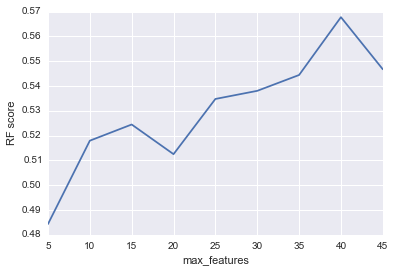

In [33]:
plt.xlabel('max_features')
plt.ylabel('RF score')
plt.plot(maxFeatureNums, scoreList)

In [34]:
# i would like to see how score changes with max_feature
nEstList = []
nEstScoreList = []

for i in range(10,1000,100):
    rfmodelB = RandomForestRegressor(n_estimators=i, max_features=50)
    rfmodelB.fit(XB_train, yB_train)
    nEstList.append(i)
    nEstScoreList.append(rfmodelB.score(XB_test, yB_test))

nEstScoreList

[0.52351788682599076,
 0.54527771521955293,
 0.55793358803726412,
 0.5791394840705868,
 0.53972471869430794,
 0.55830864936404656,
 0.55953055713888267,
 0.55825963529508493,
 0.55180920404223399,
 0.55278898472341342]

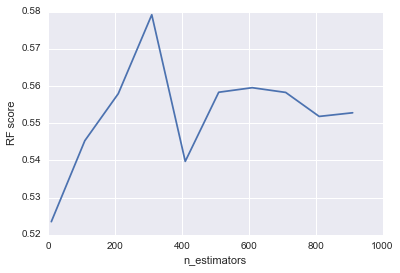

In [35]:
plt.xlabel('n_estimators')
plt.ylabel('RF score')
plt.plot(nEstList, nEstScoreList)

In [36]:
rfmodelB = RandomForestRegressor(n_estimators=500, max_features=50)
rfmodelB.fit(XB_train, yB_train)
rfmodelB.score(XB_test, yB_test)

0.55530506891634102

In [37]:
sorted(list(zip(XB_train.columns, rfmodelB.feature_importances_)),key=itemgetter(1), reverse=True)[:10]

[('China_percentage', 0.18321441820640022),
 ('Japan_percentage', 0.16608626776647817),
 ('Budget_percentage', 0.13873771890765974),
 ('Domestic_percentage', 0.086168090312067055),
 ('Intr_percentage', 0.083755671940078602),
 ('Russia_percentage', 0.074541321554077514),
 ('UK_percentage', 0.062047622419924266),
 ('BV', 0.046890584397548452),
 ('Horror', 0.042709044556879412),
 ('Action', 0.023509046040327757)]

In [38]:
kfoldA = cross_validation.KFold(len(yB), n_folds=5, shuffle=True, random_state=42)

### It is interesting to see that Japan, and China still comes out on top

In [ ]:
# 

In [38]:
kfold = cross_validation.KFold(len(yB), n_folds=5, shuffle=True, random_state=42)

In [39]:
cvScoreList = []
for train_index, test_index in kfold:
    XB2_train, XB2_test = XB.ix[train_index], XB.ix[test_index]
    yB2_train, yB2_test = yB[train_index], yB[test_index]
    rfmodelB2 = RandomForestRegressor(n_estimators=500, max_features=30)
    rfmodelB.fit(XB2_train, yB2_train)
    cvScoreList.append(rfmodelB.score(XB2_test, yB2_test))
    
cvScoreList

[0.59381518295549052,
 0.49420254593745538,
 0.56736470990247989,
 0.65035200854421005,
 0.65524864588871168]

### Apply gridsearch

In [61]:
parameters = {'n_estimators': tuple([i for i in range(100,1200,200)]),
              'max_features': tuple([i for i in range(5,50,5)])}

In [62]:
parameters

{'max_features': (5, 10, 15, 20, 25, 30, 35, 40, 45),
 'n_estimators': (100, 300, 500, 700, 900, 1100)}

In [64]:
grid_searcher = grid_search.GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [65]:
grid_searcher.fit(XB_train, yB_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 300, 500, 700, 900, 1100), 'max_features': (5, 10, 15, 20, 25, 30, 35, 40, 45)},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [66]:
grid_searcher.best_score_

0.5597178425152608

In [56]:
grid_searcher.grid_scores_

[mean: 0.51581, std: 0.05543, params: {'n_estimators': 100, 'max_features': 5},
 mean: 0.52280, std: 0.05716, params: {'n_estimators': 300, 'max_features': 5},
 mean: 0.51171, std: 0.07189, params: {'n_estimators': 500, 'max_features': 5},
 mean: 0.51292, std: 0.07063, params: {'n_estimators': 700, 'max_features': 5},
 mean: 0.51803, std: 0.05756, params: {'n_estimators': 900, 'max_features': 5},
 mean: 0.51643, std: 0.05999, params: {'n_estimators': 1100, 'max_features': 5},
 mean: 0.51566, std: 0.07017, params: {'n_estimators': 100, 'max_features': 10},
 mean: 0.53127, std: 0.04910, params: {'n_estimators': 300, 'max_features': 10},
 mean: 0.53871, std: 0.05790, params: {'n_estimators': 500, 'max_features': 10},
 mean: 0.53665, std: 0.05104, params: {'n_estimators': 700, 'max_features': 10},
 mean: 0.52496, std: 0.05856, params: {'n_estimators': 900, 'max_features': 10},
 mean: 0.53329, std: 0.06246, params: {'n_estimators': 1100, 'max_features': 10},
 mean: 0.52281, std: 0.05145, pa

In [67]:
grid_searcher.best_params_

{'max_features': 45, 'n_estimators': 100}

In [68]:
rfmodelB_gridOptimized = RandomForestRegressor(n_estimators=300, max_features=25)
rfmodelB_gridOptimized.fit(XB_train,yB_train)
rfmodelB_gridOptimized.score(XB_test, yB_test)

0.54445629404563556

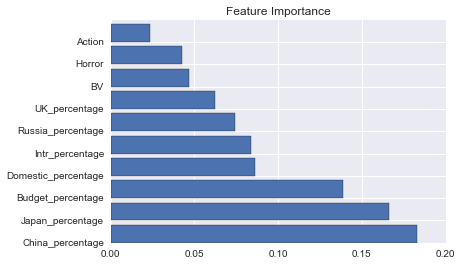

In [70]:
resultB = sorted(list(zip(XB_train.columns, rfmodelB.feature_importances_)), key=itemgetter(1), reverse=True)[:10]
categories = [x[0] for x in resultB]
values = [x[1] for x in resultB]

plt.barh(range(len(categories)), values)
plt.yticks(range(len(categories)), categories)
plt.title('Feature Importance')

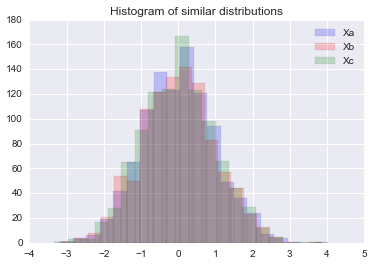

In [91]:
size = 1000
np.random.seed(seed=42)
X_seed = np.random.normal(0, 1, size)
Xa = X_seed + np.random.normal(0, 0.1, size)
Xb = X_seed + np.random.normal(0, 0.1, size)
Xc = X_seed + np.random.normal(0, 0.1, size)


plt.hist(Xa, bins=20, color='blue', alpha=0.2, label='Xa')
plt.hist(Xb, bins=20, color='red', alpha=0.2, label='Xb')
plt.hist(Xc, bins=20, color='green', alpha=0.2, label='Xc')
plt.legend(loc='upper right')
plt.title('Histogram of similar distributions')
plt.show()

C:\Python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


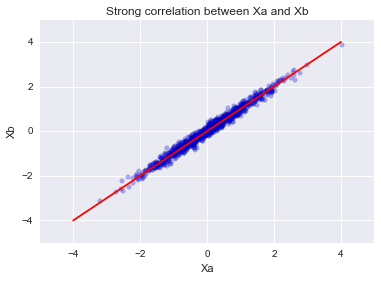

In [90]:
temp = np.linspace(-4,4,100)
plt.plot(temp, temp, color='red')
plt.scatter(Xa,Xb, alpha = 0.3)
plt.title('Strong correlation between Xa and Xb')
plt.xlabel('Xa')
plt.ylabel('Xb')
plt.show()

In [61]:
Yabc = Xa + Xb + Xc
Yabc.shape

(1000,)

In [75]:
Xabc = np.array([Xa,Xb,Xc]).T
Xabc.shape

(1000, 3)

In [100]:
rfmodelTestCase = RandomForestRegressor(n_estimators=40, max_features=2)
rfmodelTestCase.fit(Xabc, Yabc)

#sorted(list(zip([XB_train.columns], rfmodelB.feature_importances_)),key=itemgetter(1), reverse=True)
for i in zip(['Xa','Xb','Xc'],list(rfmodelTestCase.feature_importances_)):
    print(i)

('Xa', 0.35439879397567403)
('Xb', 0.44993379184679333)
('Xc', 0.19566741417753269)


In [ ]:
Xabc

In [48]:
type(XB.ix[2])

pandas.core.series.Series

In [54]:
yB[[1,2]]

1    1670400000
2    1516000000
Name: WW_gross, dtype: float64